In [1]:
import math
import numpy as np
import re

from __future__ import division
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib import pylab
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
from numpy import random
import glob
import re

In [2]:
rcParams['figure.figsize'] = (20, 16)
rcParams['font.size'] = 20

In [3]:
G = 6.67e-11

Me = 5.972e24
Re = 6.4e6

g = 9.8

def calcvNow(h0, hNow):
    v = np.sqrt(2* G * Me * (1 / (Re + hNow) - 1 / (Re + h0)))
    return v


def blogt_ofh(h):
    t = np.sqrt(Re / 2 / g)* (-np.log(np.sqrt((Re + h)/Re) - np.sqrt(h/Re)) + np.sqrt(Re * h \
                                                                                    +h**2)/Re)
    return t

def walframSol(h):
    t = Re *(np.sqrt(h/Re * (h+Re)/Re) + np.arcsinh(np.sqrt(h/Re))) * np.sqrt(1/2/g/Re)
    return t

def vNow_r(M, r0, rNow, v0):
    v = np.sqrt(2 * G * M * (1/rNow - 1/r0) + v0**2)
    return v

def numTimebyV(M, v0, r0, rt, chop = 100):#mass as singularity
    rNow = r0
    rStep = (r0 - rt) / chop
    vPrevious = v0
    tTotal = 0
    while rNow > rt:
        rNow -= rStep
        vNow = vNow_r(M, r0, rNow, v0)
        vMean = 0.5 * (vPrevious + vNow)
        vPrevious = vNow
        deltaT = rStep / vMean
        tTotal += deltaT
    return tTotal

In [4]:
print '%e'%(86400 * np.sqrt(8*Me*G)/np.pi)**(2/3)


1.340771e+08


In [5]:
tTotal = 0
hinitial = 1.345e8 - Re
hNow = hinitial
hStep = 1e2
vPrevious = 0
while hNow > 0:
    hNow -= hStep
    vNow = calcvNow(hinitial, hNow)
    vMean = 0.5 * (vPrevious + vNow)
    vPrevious = vNow
    deltaT = hStep / vMean
    tTotal += deltaT
    
print 'Hephaestus fall on to earth from %e m for a whole day'%hinitial
print tTotal/3600, 'hrs'


Hephaestus fall on to earth from 1.281000e+08 m for a whole day
24.005867808972933 hrs


In [6]:
print calcvNow(9.45e8, 0)

11119.420599953175


In [7]:
print blogt_ofh(9.45e8)/3600

24.023442187408


In [8]:
print np.arctan(np.inf)

1.5707963267948966


In [9]:
print walframSol(9.45e8)/3600

24.023442187407994


<img src="dm1.gif" width="750" align="center">

此计算有误，对速度计算时上下限错误，应为s到h

$v = \sqrt{2GM(\frac{1}{r} - \frac{1}{R})} = \sqrt{2GM / R(R/r - 1)}$

$t = 1/\sqrt{2GM / R} \int_0^{R}\frac{dr}{\sqrt{R/r - 1}}$

define $r=R\sin^2\theta$

$\int_0^{R}\frac{dr}{\sqrt{R/r - 1}} = \int_{0}^{\frac{\pi}{2}} 2R sin^2\theta d\theta = 2R \frac{\pi}{4} = \frac{\pi}{2}R$

$t = 1/\sqrt{2GM / R}  \frac{\pi}{2}R = \frac{\pi R^{3/2}}{\sqrt{8GM}}$

$\int_{R_0}^{R}\frac{dr}{\sqrt{R/r - 1}} = \int_{\arcsin{\sqrt{\frac{R_0}{R}}}}^{\frac{\pi}{2}} 2R sin^2\theta d\theta $

$\int \sin^2\theta d\theta = \frac{1}{2} (\theta - \sin\theta\cos\theta) + C$

$t = R (\frac{\pi}{2} - (\arcsin\sqrt{\frac{R_0}{R}} - \sqrt{\frac{R_0}{R}}\sqrt{1 - \frac{R_0}{R}}))$

$t = \frac{R^{3/2}}{\sqrt{8GM}}(\pi - 2(\arcsin\sqrt{\frac{R_0}{R}} - \sqrt{\frac{R_0}{R}}\sqrt{1 - \frac{R_0}{R}})))$



In [10]:
def actualTime(R0, R):
    R0oR = R0 / R
    sqrtR0oR = np.sqrt(R0oR)
    angle = 2 * (np.arcsin(sqrtR0oR) - sqrtR0oR * np.sqrt(1 - R0oR))
    t = 1/np.sqrt(8 * G * Me) * R**1.5 * (np.pi - angle)
    return t

def actualTime_approx(R):
    R0 = Re
    t = 1/np.sqrt(8 * G * Me) * (np.pi * R**1.5)
    return t

In [11]:
print actualTime(Re, 1.341e8)/3600

23.89837287464845


In [12]:
testH = 1.341e8
print actualTime(Re, testH)/3600
print actualTime_approx(testH)/3600

23.89837287464845
24.006161790817533


In [13]:
print actualTime_approx(testH) - actualTime(Re, testH)

print actualTime(0, testH) 
print actualTime_approx(testH)

388.0400982086867
86422.18244694312
86422.18244694312


In [14]:
print Re / calcvNow(hNow=0, h0=testH-Re)
print calcvNow(hNow=0, h0=testH-Re)
vRe = calcvNow(hNow=0, h0=testH-Re)

587.8291071606981
10887.518025286212


In [15]:
print numTimebyV(Me, vRe, Re, 1, chop = 250)
print numTimebyV(Me, 0, testH, 1, chop = 250)

387.9226426927624
86399.07818339506


In [16]:
Rplot = np.arange(Re, testH, 1000)
vR = vNow_r(Me, testH, Rplot, 0)
print vR

[1.08875180e+04 1.08866249e+04 1.08857320e+04 ... 1.15285456e+01
 9.41298297e+00 6.65595927e+00]


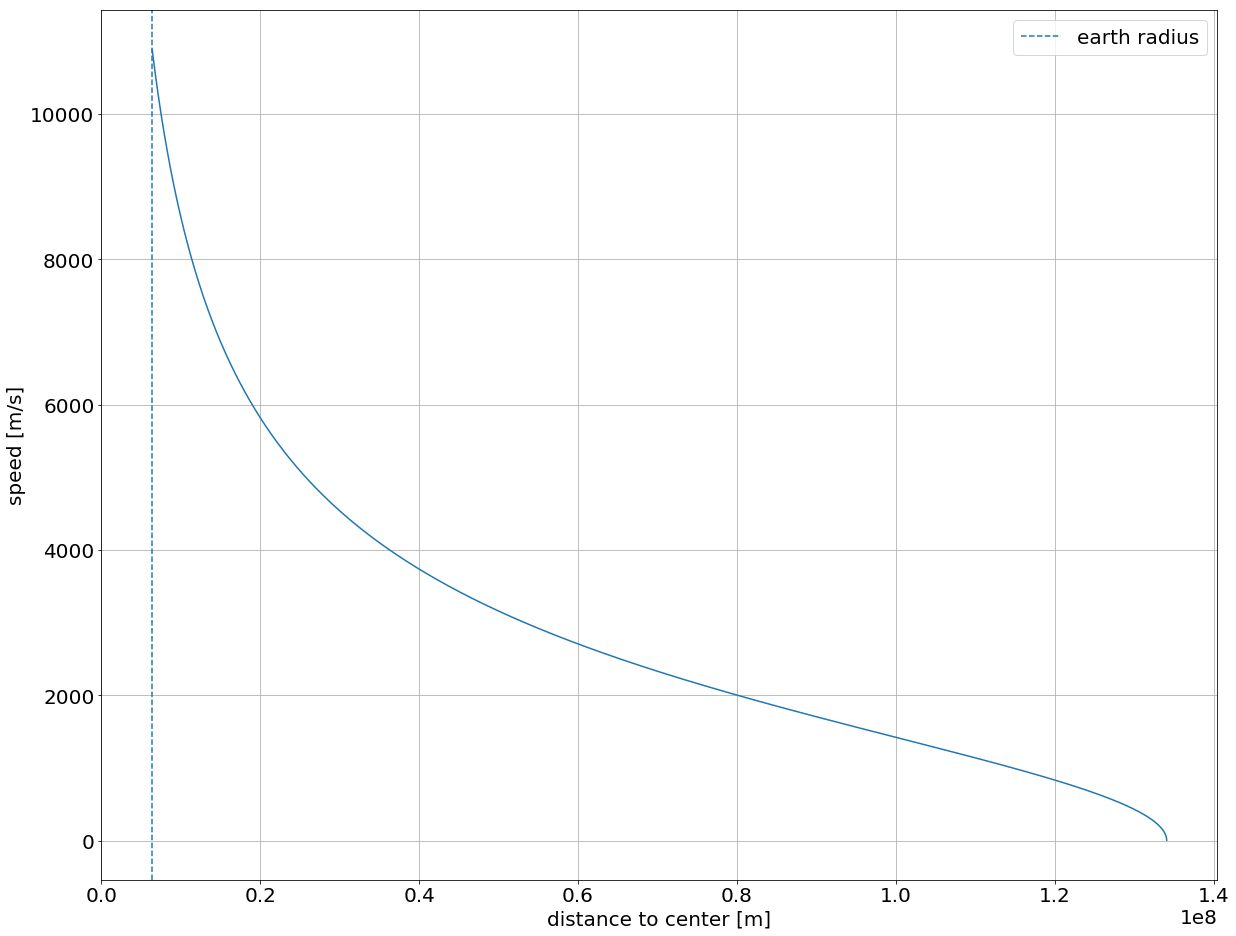

In [17]:
plot(Rplot, vR)

axvline(Re, ls = '--', label = 'earth radius')
xlabel('distance to center [m]')
ylabel('speed [m/s]')
grid()
legend()